# Projekt semestralny

## Podstawy Uczenia Maszynowego oraz Analiza i Wizualizacja Danych

Kamil Donda

Remigiusz Drobinski

### To do list

* czym jest metacritic
* jak uzyskaliśmy zbiór
* jak wygląda zbiór
* typy w zbiorze, null's
* opis, operacje, wizualizacja i konwersja do postaci liczbowej każdej z kolumn
* opis jakie operacje chcemy zrobić ze zbiorem (regresje)
* standaryzacja, minimalizacja etc
* porównanie metod regresji
* wnioski


## Czym jest metacritic? 

Amerykańska strona internetowa agregująca recenzje albumów muzycznych, gier komputerowych, filmów i seriali. 
Na podstawie ocen z recenzji zlicza średnią przedstawiającą przyjęcie danego medium przez krytyków.

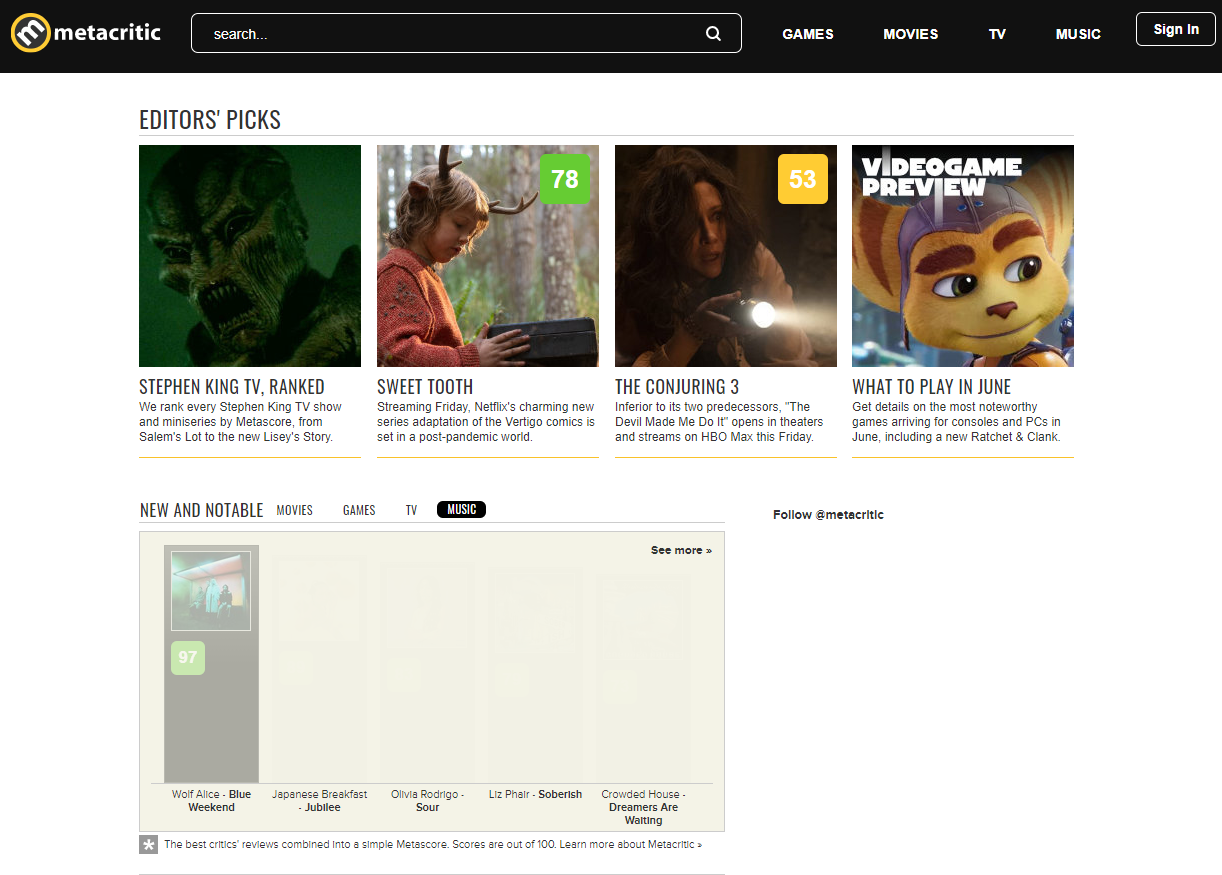

Nas najbardziej interesują podstrony poświęcone grom. Z każdej z takiej podstrony jesteśmy w stanie uzyskać ciekawe informacje m.in. nazwę, wydawcę, opis czy producenta gry. Tak prezentuje się przykładowa podstrona:

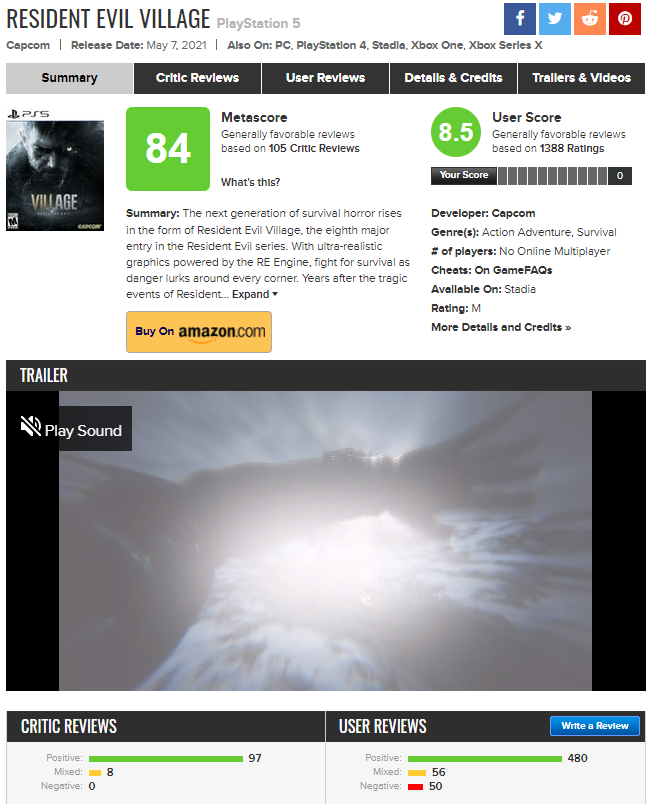

## Zbiór danych - proces tworzenia

Przy pomocy widocznego, autorskiego skryptu uzyskaliśmy zbiór obiektów, które zostały zapisane w pliku .json

Skrypt:

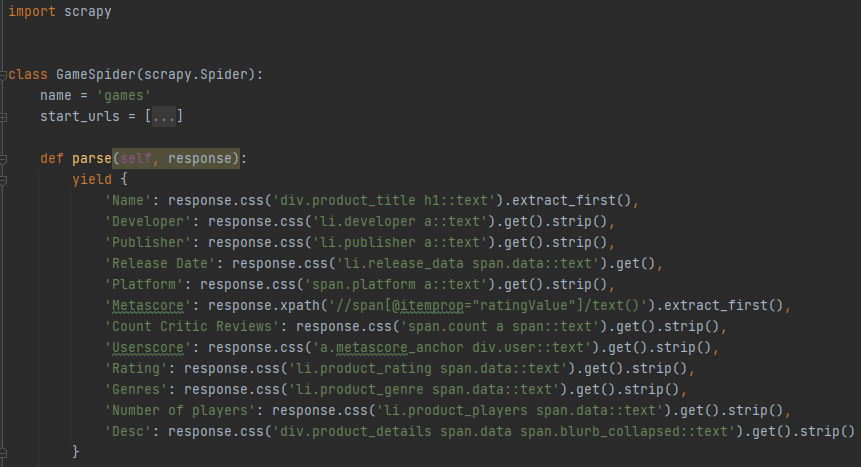

Przykładowy obiekt:

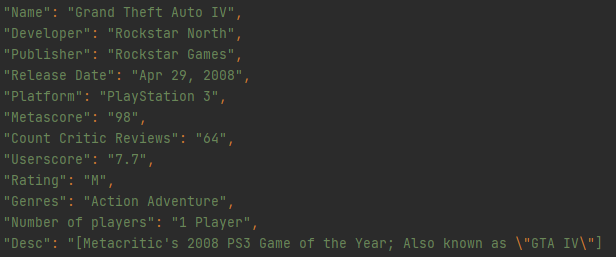

### !!! Informacja

Zważywszy na wielkość pliku database.json do projektu zostanie dołączona jego okrojona wersja (~ 7000 rekordów). Pełna wersja zbioru dostępna jest pod adresem:

[adres]

## Zbiór danych - atrybuty 

1. **Name** - nazwa gry
2. **Developer** - oddział bądź studio odpowiedzialne za stworzenie tytułu
3. **Publisher** - studio odpowiedzialne za wydanie gry
4. **Release Date** - data wydania produkcji
5. **Platform** - platforma, na której weryfikowana była gra
6. **Metascore** - ocena gry, powstała przez uśrednienie recenzji krytyków
7. **CCR (Count Critic Reviews)** - liczba recenzji krytków
8. **Userscore** - ocena gry, powstała przez uśrednienie opinii użytkowników
9. **Rating** - sugerowany, minimalny wiek grającego
10. **Genres** - typ bądź typy, które charakteryzują grę
11. **NOP (Number of players)** - maksymalna liczba graczy
12. **Desc** - skrócony opis produkcji

## Realizacja zadania

In [1]:
# pierwszym krokiem jest wczytanie potrzebnych do realizacji bibliotek

import pandas as pd # wczytanie, operacje i wizualizacja zbioru danych
import numpy as np # operacje i wizualizacja zbioru danych
import matplotlib.pyplot as plt # wizualizacja zbioru danych
import plotly.express as px # wizualizacja zbioru danych
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler # obróbka danych
from sklearn import tree
from sklearn.model_selection import train_test_split # dzielenie zbiorów
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
import math 

In [2]:
# Za pomocą 'pandas' ustawiane zostaje formatowanie zmiennych ciągłych z precyzją do trzech miejsc po przecinku oraz 
# wyświetlanie wszystkich kolumn oraz wierszy.

pd.set_option('float_format', '{:.3f}'.format)
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)

In [3]:
# wczytanie zbioru danych

games = pd.read_json('database.json')

In [4]:
# prosta wizualizacja zbioru danych (5 pierwszych rekordów)

games.head()

,Name,Developer,Publisher,Release Date,Platform,Metascore,Count Critic Reviews,Userscore,Rating,Genres,Number of players,Desc
0,Grand Theft Auto IV,Rockstar North,Rockstar Games,"Apr 29, 2008",PlayStation 3,98,64,7.7,M,Action Adventure,1 Player,[Metacritic's 2008 PS3 Game of the Year; Also ...
1,Red Dead Redemption 2,Rockstar Games,Rockstar Games,"Oct 26, 2018",Xbox One,97,33,7.9,M,Action Adventure,Up to 32,Developed by the creators of Grand Theft Auto ...
2,Grand Theft Auto IV,Rockstar North,Rockstar Games,"Apr 29, 2008",Xbox 360,98,86,7.9,M,Action Adventure,1 Player,[Metacritic's 2008 Xbox 360 Game of the Year; ...
3,Grand Theft Auto V,Rockstar North,Rockstar Games,"Sep 17, 2013",PlayStation 3,97,50,8.3,M,Modern,Up to 16,"Los Santos is a vast, sun-soaked metropolis fu..."
4,Grand Theft Auto V,Rockstar North,Rockstar Games,"Sep 17, 2013",Xbox 360,97,58,8.3,M,Modern,Up to 16,Los Santos is a sprawling sun-soaked metropoli...


In [5]:
# sprawdzanie czy wszystkie komórki są zapełnione wartościami czy jednak istnieją komórki puste
# ponadto następuje wypisanie sumy pustych komórek dla poszczególnych kolumn

summary = pd.DataFrame(games.isnull().any(), columns = ['Nulls'])
summary['Sum'] = pd.DataFrame(games.isnull().sum())
print(summary)

                      Nulls  Sum
Name                  False    0
Developer             False    0
Publisher             False    0
Release Date          False    0
Platform              False    0
Metascore             False    0
Count Critic Reviews  False    0
Userscore             False    0
Rating                False    0
Genres                False    0
Number of players     False    0
Desc                  False    0


### !!! Informacja

Jak widać zbiór nie zawiera pustych komórek wartości. Z drugiej jednak strony szczątkowa wizualizacja nakazuje objaśnienie oraz obróbkę danych względem kolumn co aktualnie nastąpi.

## Zmienne zbioru 

### Name 

Zmienna "Name" jak sama nazwa wskazuje oznacza nazwę danej gry. Należy natomiast zaznaczyć że nie jest to wartość unikalna, bowiem np. rekord "3" jak i "4" mają tę samą wartość. Ta sama wartość nie oznacza natomiast że rekordy są identyczne, gdyż różnią się wartościami innych zmiennych.

In [6]:
# Operacje na wartościach kolumny
print(f'Na ten moment posiadamy rekordów: {np.shape(games)}')
print(f'W tym nazw unikalnych, co za tym idzie gier jest: ')
print(np.shape(np.unique(games['Name'])))

Na ten moment posiadamy rekordów: (7037, 12)
W tym nazw unikalnych, co za tym idzie gier jest: 
(5089,)


In [7]:
# Sprawdźmy zatem jaki tytuł zajął najwięcej rekordów
unique_name_array_count = games['Name'].value_counts()
print(unique_name_array_count)


DOOM                              5
Shantae and the Pirate's Curse    5
Resident Evil 4                   5
Resident Evil 5                   5
Bayonetta                         5
                                 ..
Digimon Story Cyber Sleuth        1
New Pokemon Snap                  1
Smash Hit Plunder                 1
Just Shapes & Beats               1
Night Watch                       1
Name: Name, Length: 5089, dtype: int64


In [8]:
# Wizualizacja

### Developer

Producent gier komputerowych – zespół zajmujący się tworzeniem dzieł elektronicznej rozrywki. Producent gry może działać na zlecenie przedsiębiorstwa ją wydającego lub działać samodzielnie jako niezależne studio. Studia produkujące gry mogą tworzyć swe dzieła na liczne platformy sprzętowe lub specjalizować się w produkcji gier na jedną platformę. Rzadziej natomiast określenie to jest stosowane do osoby kierującej produkcją danej gry.

Twórcy gier to ludzie, którzy pracują w zespołach deweloperskich. To właśnie w nich planują, projektują i produkują gry wideo na komputery, urządzenia mobilne lub konsole. Ich praca polega na tworzeniu treści wizualnych do gry i pisaniu kodu w celu zaimplementowania wszystkich funkcjonalności gry. Kariera Game Developera wymaga doświadczenia w tworzeniu oprogramowania, znajomości z zakresu zagadnień matematycznych oraz umiejętności dobrej współpracy z innymi osobami w celu osiągnięcia celów projektu. Wiele mówi się o tym, że dobrzy gracze tworzą najlepsze gry.

In [9]:
# Operacje na wartościach kolumny
print(np.shape(np.unique(games['Developer'])))
unique_dev_array_count = games['Developer'].value_counts()
print(unique_dev_array_count)

x = np.unique(games['Developer'])
for i in range(len(x)):
    games.loc[games['Developer'] == x[i], 'Developer'] = i

(1770,)
Capcom                   161
EA Canada                 94
EA Sports                 94
Square Enix               82
Ubisoft Montreal          80
                        ... 
SoftMax                    1
HopFrog                    1
Digital Spray Studios      1
Digital Happiness          1
QUByte Interactive         1
Name: Developer, Length: 1770, dtype: int64


In [10]:
# Wizualizacja
import plotly.express as px
 
labels = ['Capcom','EA Sports', 'EA Canada', 'Square Enix','Ubissoft Montreal']
valTab = [161, 94, 94, 82, 80]

fig = px.pie(values = valTab, names = labels, color_discrete_sequence = px.colors.sequential.Viridis)
 
fig.update_traces(textposition = 'inside', textinfo = 'percent+label+value', marker = dict(line = dict(color = '#FFFFFF', width = 4)),
                  textfont_size = 15, title = 'Wykres kołowy względem developerów')
 
fig.show()

### Publisher

Wydawca gier komputerowych – przedsiębiorstwo publikujące gry komputerowe, tworzone przez własne bądź wybrane studia producentów gier komputerowych.

Wydawcy gier komputerowych są odpowiedzialni za tworzenie, marketing (włączając w to badania rynku) oraz wszystkie aspekty reklamy.

Zwykle to wydawca finansuje rozwój gry, czasem płacąc producentowi gry (czasem dzięki tej umowie, producent otrzymuje pracowników do pomocy w grze, nazywanych studiem).

Więksi wydawcy zajmują się także dystrybucją gier, które wydają, podczas gdy mniejsi wydawcy wynajmują firmy dystrybutorskie (lub większych wydawców), do dystrybucji swoich gier.

Inne funkcje, których zwykle podejmuje się wydawca to wybór i zapłata za licencje, na podstawie których można stworzyć grę, zapłata za lokalizację gry, stworzenie podręcznika użytkownika oraz tworzenie elementów graficznych, takich jak loga, czy wygląd pudełka gry. Więksi wydawcy mogą także spróbować zwiększyć wydajność wszystkich wewnętrznych i zewnętrznych wydziałów rozbudowy przez dostarczanie takich usług, jak projektowanie dźwięku.

Ponieważ zwykle wydawcy finansują tworzenie gry, często próbują poradzić sobie z jego ryzykiem radzą się producentów lub kierowników projektu, by monitorowali postęp tworzenia produktu i asystowali przy nim, jeżeli będzie to konieczne. Większość zewnętrznych wydawców gier opłaca swoje dzieła w odpowiednich etapach produkcji, nazywanych kamieniami milowymi.

In [11]:
# Operacje na wartościach kolumny
print(np.shape(np.unique(games['Publisher'])))
unique_pub_array_count = games['Publisher'].value_counts()[:5].sort_values(ascending = False)
print(unique_pub_array_count)

x = np.unique(games['Publisher'])
for i in range(len(x)):
    games.loc[games['Publisher'] == x[i], 'Publisher'] = i

(753,)
Electronic Arts    347
Ubisoft            340
Activision         273
Sega               242
Capcom             239
Name: Publisher, dtype: int64


In [12]:
# Wizualizacja
import plotly.express as px
 
labels = ['Electronic Arts', 'Ubisoft', 'Activision', 'Sega', 'Capcom']
valTab = [347, 340, 273, 242, 239]

fig = px.pie(values = valTab, names = labels, color_discrete_sequence = px.colors.sequential.Viridis)
 
fig.update_traces(textposition = 'inside', textinfo = 'percent+label+value', marker = dict(line = dict(color = '#FFFFFF', width = 4)),
                  textfont_size = 15, title = 'Wykres kołowy względem wydawców')
 
fig.show()

### Release date

Data wydania gry na konkretną platformę.

In [13]:
# Operacje na wartościach kolumny

In [14]:
# Wizualizacja

### Platform

In [15]:
# Opis

In [16]:
# Operacje na wartościach kolumny
print(np.shape(np.unique(games['Platform'])))
unique_platform_array_count = games['Platform'].value_counts().sort_values(ascending = False)
print(unique_platform_array_count)

(13,)
PC                  1825
PlayStation 2       1129
Xbox 360             948
PlayStation 4        853
Switch               823
PlayStation 3        693
Xbox One             463
3DS                  130
PlayStation Vita      91
Wii U                 50
PlayStation 5         22
Xbox Series X          8
Stadia                 2
Name: Platform, dtype: int64


In [17]:
# Wizualizacja
import plotly.express as px
 
labels = ['PC','PlayStation 2','Xbox 360','PlayStation 4','Switch']
valTab = [1825, 1129, 948, 853, 823]

fig = px.pie(values = valTab, names = labels, color_discrete_sequence = px.colors.sequential.Viridis)
 
fig.update_traces(textposition = 'inside', textinfo = 'percent+label+value', marker = dict(line = dict(color = '#FFFFFF', width = 4)),
                  textfont_size = 15, title = 'Wykres kołowy względem wydawców')
 
fig.show()

In [18]:
x = np.unique(games['Platform'])
for i in range(len(x)):
    games.loc[games['Platform'] == x[i], 'Platform'] = i

### Metascore

In [19]:
# Opis

In [20]:
# Operacje na wartościach kolumny# Wizualizacja

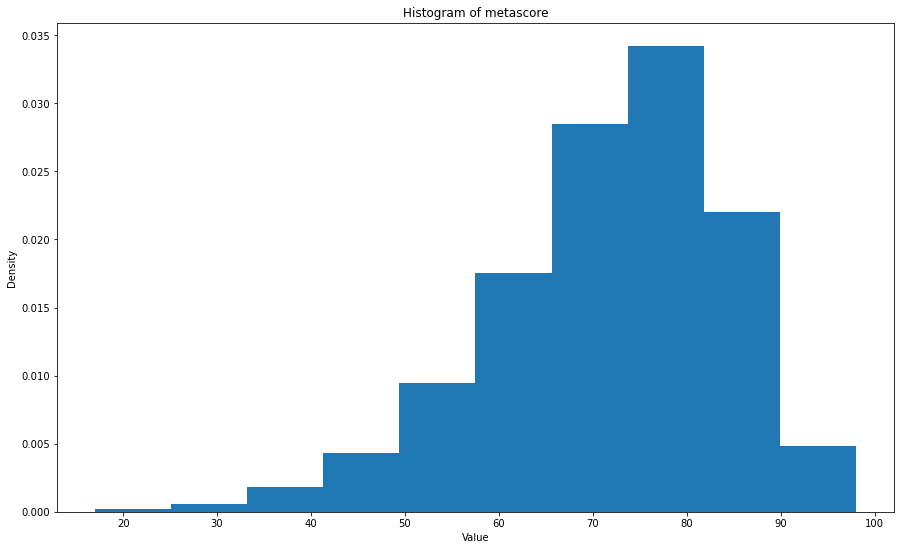

In [21]:
# Wizualizacja
plt.figure(figsize = (15, 9))
plt.title('Histogram of metascore')
plt.xlabel('Value')
plt.ylabel('Density')
plt.hist(games['Metascore'], density = True)
plt.show()

### Count Critic Reviews

In [22]:
# Opis

In [23]:
# Operacje na wartościach kolumny

In [24]:
# Wizualizacja

### Userscore

In [25]:
games.loc[games['Userscore'] == "'", 'Userscore'] = ''
games.loc[games['Userscore'] == "tbd", 'Userscore'] = None
#games = games[~games.Userscore.isnull()]

In [26]:
unique_userscore_array_count = games['Userscore'].value_counts().sort_values(ascending = False)
print(unique_userscore_array_count)

7.7    315
7.8    277
7.6    271
8.0    259
7.5    241
7.9    241
7.4    234
7.3    230
8.3    223
8.1    218
7.2    204
7.1    200
7.0    196
8.5    190
8.2    184
8.4    183
8.6    169
8.7    162
6.6    157
6.8    152
6.9    145
6.4    138
8.8    136
6.5    125
6.3    118
6.7    113
6.0    109
6.1    103
6.2    101
5.8     93
5.9     77
5.7     69
5.6     68
5.0     63
5.2     62
5.5     60
8.9     59
5.3     55
4.9     49
4.8     45
5.4     45
4.7     35
5.1     35
4.6     32
4.4     31
4.1     30
9.0     30
4.2     29
4.0     29
4.5     28
3.8     28
9.1     25
4.3     24
3.6     22
3.7     22
3.4     19
3.5     18
3.3     16
3.1     16
3.9     15
9.2     15
3.0     13
3.2     11
2.9     11
2.6      8
2.8      8
2.2      7
2.5      6
2.4      5
2.0      5
1.9      4
2.7      4
2.3      4
2.1      4
1.7      4
1.4      3
1.3      2
1.5      2
9.4      1
1.6      1
9.6      1
1.1      1
9.3      1
0.7      1
0.8      1
0.5      1
1.2      1
1.0      1
1.8      1
0.2      1
9.8      1

In [27]:
games.loc[games['Number of players'] == 'Up to 9', 'Number of players'] = 9

### Rating

### Entertainment Software Rating Board (ESRB)

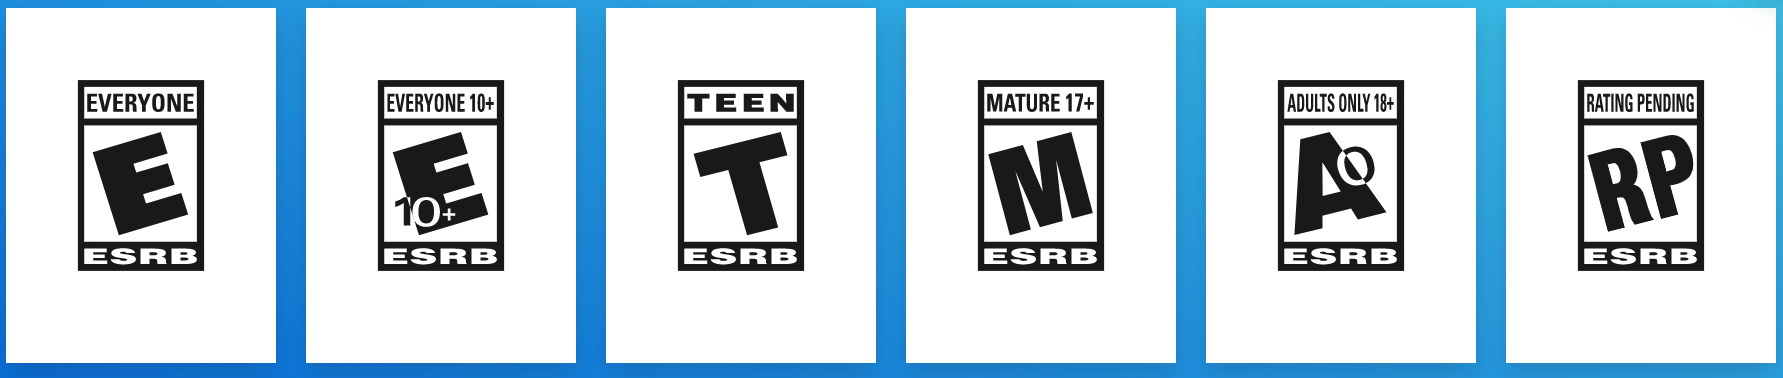

### Pan European Game Information (PEGI)

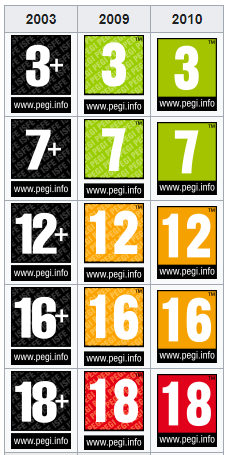

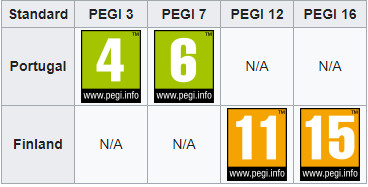

### Unterhaltungssoftware Selbstkontrolle (USK)

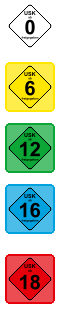

In [28]:
# Operacje na wartościach kolumny
unique_rating_array_count = games['Rating'].value_counts().sort_values(ascending = False)
print(unique_rating_array_count)

T       2561
M       1957
E       1559
E10+     953
RP         4
K-A        2
AO         1
Name: Rating, dtype: int64


In [29]:
# Wizualizacja
import plotly.express as px
 
labels = ['T','M','E','E10+','RP','K-A','AO']
valTab = [2561, 1957, 1559, 953, 4, 2, 1]

fig = px.pie(values = valTab, names = labels, color_discrete_sequence = px.colors.sequential.Viridis)
 
fig.update_traces(textposition = 'inside', textinfo = 'percent+label+value', marker = dict(line = dict(color = '#FFFFFF', width = 1)),
                  textfont_size = 15, title = 'Wykres kołowy względem wydawców')
 
fig.show()

In [30]:
games.loc[games['Rating'] == 'T', 'Rating'] = 13
games.loc[games['Rating'] == 'M', 'Rating'] = 17
games.loc[games['Rating'] == 'E', 'Rating'] = 3
games.loc[games['Rating'] == 'E10+', 'Rating'] = 10
games.loc[games['Rating'] == 'RP', 'Rating'] = None
games.loc[games['Rating'] == 'K-A', 'Rating'] = 18
games.loc[games['Rating'] == 'AO', 'Rating'] = None


### Genres

In [31]:
# Opis

In [32]:
# Operacje na wartościach kolumny

for i in range(len(games['Genres'])):
    games.at[i, 'Genres'] = games['Genres'][i].split(' ')

y = MultiLabelBinarizer().fit_transform(games.Genres)
for i in range(len(games.Genres)):
    games.at[i, 'Genres'] = y[i]

### Number of players

In [33]:
# Opis

In [34]:
games.loc[games['Number of players'] == 'No Online Multiplayer', 'Number of players'] = 1
games.loc[games['Number of players'] == '1 Player', 'Number of players'] = 1
games.loc[games['Number of players'] == '1-2', 'Number of players'] = 2
games.loc[games['Number of players'] == 'Up to 4', 'Number of players'] = 4
games.loc[games['Number of players'] == 'Up to 8', 'Number of players'] = 8
games.loc[games['Number of players'] == '2', 'Number of players'] = 2
games.loc[games['Number of players'] == '1-4', 'Number of players'] = 4
games.loc[games['Number of players'] == '2  Online', 'Number of players'] = 2
games.loc[games['Number of players'] == '1-8', 'Number of players'] = 8
games.loc[games['Number of players'] == '4  Online', 'Number of players'] = 4
games.loc[games['Number of players'] == 'Online Multiplayer', 'Number of players'] = 0
games.loc[games['Number of players'] == '8  Online', 'Number of players'] = 8
games.loc[games['Number of players'] == 'Up to 16', 'Number of players'] = 16
games.loc[games['Number of players'] == 'Up to 12', 'Number of players'] = 12
games.loc[games['Number of players'] == 'Massively Multiplayer', 'Number of players'] = 0
games.loc[games['Number of players'] == 'Up to 6', 'Number of players'] = 6
games.loc[games['Number of players'] == 'Up to 10', 'Number of players'] = 10
games.loc[games['Number of players'] == '16  Online', 'Number of players'] = 16
games.loc[games['Number of players'] == '1-16', 'Number of players'] = 16
games.loc[games['Number of players'] == '6  Online', 'Number of players'] = 6
games.loc[games['Number of players'] == 'Up to 22', 'Number of players'] = 22
games.loc[games['Number of players'] == '1-32', 'Number of players'] = 32
games.loc[games['Number of players'] == '32  Online', 'Number of players'] = 32
games.loc[games['Number of players'] == 'Up to 18', 'Number of players'] = 18
games.loc[games['Number of players'] == '1-6', 'Number of players'] = 6
games.loc[games['Number of players'] == 'Up to 3', 'Number of players'] = 3
games.loc[games['Number of players'] == 'Up to 24', 'Number of players'] = 24
games.loc[games['Number of players'] == '10  Online', 'Number of players'] = 10
games.loc[games['Number of players'] == 'Up to 32', 'Number of players'] = 32
games.loc[games['Number of players'] == 'Up to 20', 'Number of players'] = 20
games.loc[games['Number of players'] == 'Up to 5', 'Number of players'] = 5
games.loc[games['Number of players'] == '12  Online', 'Number of players'] = 12
games.loc[games['Number of players'] == 'Up to 40', 'Number of players'] = 40
games.loc[games['Number of players'] == 'Up to more than 64', 'Number of players'] = 64
games.loc[games['Number of players'] == 'Up to 64', 'Number of players'] = 64
games.loc[games['Number of players'] == '1-12', 'Number of players'] = 12
games.loc[games['Number of players'] == '1-5', 'Number of players'] = 5
games.loc[games['Number of players'] == '1-3', 'Number of players'] = 3
games.loc[games['Number of players'] == '24  Online', 'Number of players'] = 24
games.loc[games['Number of players'] == 'Up to 14', 'Number of players'] = 14
games.loc[games['Number of players'] == '1-64', 'Number of players'] = 64
games.loc[games['Number of players'] == '64  Online', 'Number of players'] = 64
games.loc[games['Number of players'] == '1-10', 'Number of players'] = 10
games.loc[games['Number of players'] == 'Up to 30', 'Number of players'] = 30
games.loc[games['Number of players'] == '5  Online', 'Number of players'] = 5
games.loc[games['Number of players'] == 'Up to 60', 'Number of players'] = 60
games.loc[games['Number of players'] == '64+  Online', 'Number of players'] = 64
games.loc[games['Number of players'] == '3  Online', 'Number of players'] = 3
games.loc[games['Number of players'] == '44  Online', 'Number of players'] = 44
games.loc[games['Number of players'] == '64+', 'Number of players'] = 64
games.loc[games['Number of players'] == 'Up to 9', 'Number of players'] = 9
games.loc[games['Number of players'] == 'Up to 15', 'Number of players'] = 15
games.loc[games['Number of players'] == 'Up to 36', 'Number of players'] = 36
games.loc[games['Number of players'] == '14  Online', 'Number of players'] = 14
games.loc[games['Number of players'] == '1-24', 'Number of players'] = 24
games.loc[games['Number of players'] == 'Friend System Only', 'Number of players'] = 2

In [35]:
# Operacje na wartościach kolumny
unique_NOP_array_count = games['Number of players'].value_counts().sort_values(ascending = False)
print(unique_NOP_array_count)

1     3430
2      908
4      765
8      645
16     255
0      244
6      164
12     149
10     106
32      90
64      47
22      37
3       36
24      34
5       34
18      30
20      20
40      16
14      10
30       6
60       4
44       3
9        2
36       1
15       1
Name: Number of players, dtype: int64


In [36]:
# Wizualizacja
import plotly.express as px
 
labels = ['1 Player','2 Players','4 Players','8 Players','16 Players','6 Players','12 Players']
valTab = [3430, 908, 765, 645, 255, 164, 149]

fig = px.pie(values=valTab, names=labels, color_discrete_sequence=px.colors.sequential.Viridis)
 
fig.update_traces(textposition = 'inside', textinfo = 'percent+label+value', marker = dict(line = dict(color = '#FFFFFF', width = 1)),
                  textfont_size = 15, title = 'Wykres kołowy względem liczby graczy')
 
fig.show()

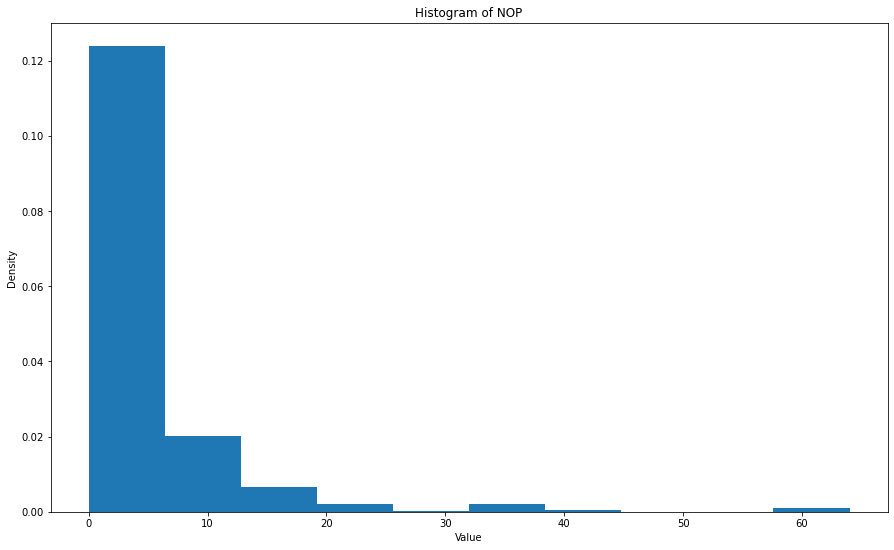

In [37]:
plt.figure(figsize=(15, 9))
plt.title('Histogram of NOP')
plt.xlabel('Value')
plt.ylabel('Density')
plt.hist(games['Number of players'], density=True)
plt.show()

In [38]:
print(games.loc[0,'Genres'])
games.head()

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


,Name,Developer,Publisher,Release Date,Platform,Metascore,Count Critic Reviews,Userscore,Rating,Genres,Number of players,Desc
0,Grand Theft Auto IV,1263,550,"Apr 29, 2008",3,98,64,7.7,17,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,[Metacritic's 2008 PS3 Game of the Year; Also ...
1,Red Dead Redemption 2,1260,550,"Oct 26, 2018",11,97,33,7.9,17,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",32,Developed by the creators of Grand Theft Auto ...
2,Grand Theft Auto IV,1263,550,"Apr 29, 2008",10,98,86,7.9,17,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,[Metacritic's 2008 Xbox 360 Game of the Year; ...
3,Grand Theft Auto V,1263,550,"Sep 17, 2013",3,97,50,8.3,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16,"Los Santos is a vast, sun-soaked metropolis fu..."
4,Grand Theft Auto V,1263,550,"Sep 17, 2013",10,97,58,8.3,17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",16,Los Santos is a sprawling sun-soaked metropoli...


In [39]:
games['Userscore'] = games.Userscore.astype(float)
games['Release Date'] = pd.to_datetime(games['Release Date'])
games['Metascore'] = games.Metascore.astype(int)
games['Count Critic Reviews'] = games['Count Critic Reviews'].astype(int)
games['Number of players'] = games['Number of players'].astype(int)
games = games[~games.Userscore.isnull()]
games = games[~games.Rating.isnull()]
games.dtypes
X = games.drop(['Name','Metascore','Desc','Release Date','Genres'], axis=1)
y = games.drop(['Name','Desc','Release Date','Developer','Publisher','Platform','Genres','Count Critic Reviews','Userscore','Number of players','Rating'], axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)


In [41]:
models = []
for i in range(40):
    model = tree.DecisionTreeRegressor(max_depth = i + 1, random_state = 234)
    model.fit(X_train, y_train)
    models.append(model)

In [42]:
scores = []

for i in range(len(models)):
    train_score = models[i].score(X_train, y_train)
    test_score = models[i].score(X_test, y_test)
    scores.append((train_score, test_score, models[i]))

In [43]:
scores = sorted(scores, key = lambda score: score[1], reverse = True)
best_train_score = scores[0][0]
best_test_score = scores[0][1]
best_model = scores[0][2]
print(f'Dokładność klasyfikacji na zbiorze treningowym wynosi: {best_train_score * 100:.2f}%, zaś na zbiorze testowym: {best_test_score * 100:.2f}%.')
print(f'Błąd średniokwadratowy wynosi: {mse(best_model.predict(X_test), y_test):.2f}')

Dokładność klasyfikacji na zbiorze treningowym wynosi: 40.95%, zaś na zbiorze testowym: 38.40%.
Błąd średniokwadratowy wynosi: 101.75


In [44]:
summary = pd.DataFrame(games.isnull().any(), columns = ['Nulls'])
summary['Sum'] = pd.DataFrame(games.isnull().sum())
print(summary)

                      Nulls  Sum
Name                  False    0
Developer             False    0
Publisher             False    0
Release Date          False    0
Platform              False    0
Metascore             False    0
Count Critic Reviews  False    0
Userscore             False    0
Rating                False    0
Genres                False    0
Number of players     False    0
Desc                  False    0


In [45]:
path = best_model.cost_complexity_pruning_path(X_train,
                                               y_train)
alphas = path.ccp_alphas

In [46]:
pruned_models = []
for alpha in alphas:
    model = tree.DecisionTreeRegressor(random_state=0,
                                             ccp_alpha=alpha)
    model.fit(X_train, y_train)
    pruned_models.append(model)

In [47]:
pruned_scores = sorted([(clf.score(X_test, y_test), clf) for clf in pruned_models], key = lambda clf: clf[0], reverse = True)
best_test_score_pruned = pruned_scores[0][0]
best_model_pruned = pruned_scores[0][1]
print(f'Dokładność klasyfikacji na zbiorze testowym po przycięciu wynosi: {best_test_score_pruned * 100:.2f}%.')
print(f'Błąd średniokwadratowy wynosi: {mse(best_model_pruned.predict(X_test), y_test):.2f}')

Dokładność klasyfikacji na zbiorze testowym po przycięciu wynosi: 40.58%.
Błąd średniokwadratowy wynosi: 98.15
